# Aplicación de la Puerta Pauli-X (NOT cuántico) sobre el estado |0⟩

## Estado inicial

El qubit comienza en el estado base computacional **|0⟩**:

$$
|0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}
\qquad \Rightarrow\qquad 
|ψ\rangle = 1\cdot|0\rangle + 0\cdot|1\rangle
$$

Amplitudes: `[1.0 + 0j, 0.0 + 0j]`

## Acción de la puerta Pauli-X

La puerta Pauli-X tiene la matriz:

$$
X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
$$

Al aplicarla sobre |0⟩:

$$
X|0\rangle = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
\begin{pmatrix} 1 \\ 0 \end{pmatrix}
= \begin{pmatrix} 0 \\ 1 \end{pmatrix}
= |1\rangle
$$

Por lo tanto, el estado final es exactamente **|1⟩**:

$$
|ψ'\rangle = 0\cdot|0\rangle + 1\cdot|1\rangle
$$

## Probabilidades de medición

Al medir en la base computacional:

- P(|0⟩) = |0|² = 0   →   0.0%
- P(|1⟩) = |1|² = 1   →   100.0%

El resultado de la medición es **determinista**: siempre obtendremos |1⟩.

## Interpretación geométrica en la esfera de Bloch

- El estado |0⟩ corresponde al polo norte de la esfera de Bloch.
- El estado |1⟩ corresponde al polo sur.
- La puerta Pauli-X realiza una **rotación de 180° alrededor del eje X**, llevando el vector de Bloch del polo norte al polo sur.

## Simulación experimental

Aunque teóricamente el resultado es 100% |1⟩, ejecutamos el circuito muchas veces (shots = 1024) en un simulador para obtener estadísticas.

En un simulador ideal (sin ruido):
- Todos los shots darán el resultado '1'
- Conteo aproximado: |0⟩ → 0 veces, |1⟩ → 1024 veces

El histograma mostrará una única barra al 100% en |1⟩.



=== APLICACIÓN DE LA PUERTA PAULI-X (NOT CUÁNTICO) SOBRE |0⟩ ===

Estado inicial del qubit: |0⟩
Amplitudes iniciales: [1.0 + 0j, 0.0 + 0j] → 1|0⟩ + 0|1⟩

Circuito cuántico:


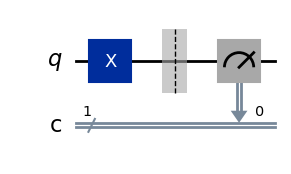


=== RESULTADO TEÓRICO ===
Statevector final: [0.+0.j 1.+0.j]
Estado resultante: |ψ'⟩ = (0.000+0.000j)|0⟩ + (1.000+0.000j)|1⟩
Transformación: |0⟩ → |1⟩
Probabilidades teóricas:
P(|0⟩) = 0.000 (0.0%)
P(|1⟩) = 1.000 (100.0%)

=== RESULTADO EXPERIMENTAL ===
Resultados de simulación (1024 shots):
|0⟩:    0 veces (0.0%) - Teórico: 0.0%
|1⟩: 1024 veces (100.0%) - Teórico: 100.0%

Distribución de resultados:


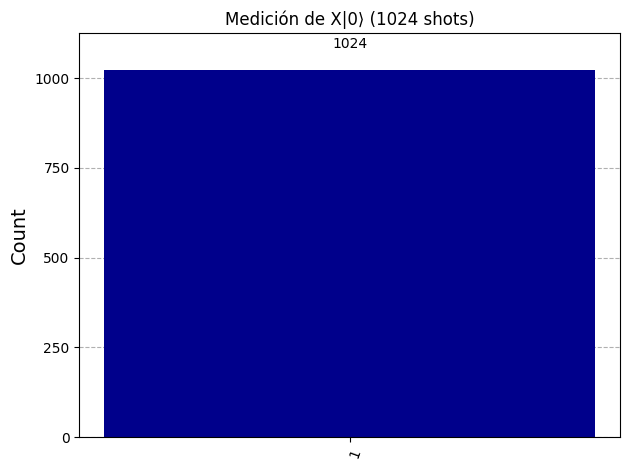

In [4]:
# Importar librerías necesarias
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display

print("=== APLICACIÓN DE LA PUERTA PAULI-X (NOT CUÁNTICO) SOBRE |0⟩ ===\n")

print("Estado inicial del qubit: |0⟩")
print("Amplitudes iniciales: [1.0 + 0j, 0.0 + 0j] → 1|0⟩ + 0|1⟩\n")

# Circuito base (1 qubit + 1 bit clásico)
qc = QuantumCircuit(1, 1)
qc.x(0)

# Circuito con medición para simulación
qc_sim = qc.copy()
qc_sim.barrier()          # Separador visual bonito
qc_sim.measure(0, 0)

# ¡Circuito gráfico bonito!
print("Circuito cuántico:")
display(qc_sim.draw(output='mpl'))
print()  # Línea en blanco

# ========================
# RESULTADO TEÓRICO
# ========================
print("=== RESULTADO TEÓRICO ===")
sv = Statevector.from_instruction(qc)

print(f"Statevector final: {sv.data}")
# Formato exacto con parte imaginaria explícita
print(f"Estado resultante: |ψ'⟩ = ({sv.data[0].real:.3f}{sv.data[0].imag:+.3f}j)|0⟩ + ({sv.data[1].real:.3f}{sv.data[1].imag:+.3f}j)|1⟩")
print("Transformación: |0⟩ → |1⟩")

probs = sv.probabilities_dict()
print("Probabilidades teóricas:")
print(f"P(|0⟩) = {probs.get('0', 0.0):.3f} ({probs.get('0', 0.0):.1%})")
print(f"P(|1⟩) = {probs.get('1', 0.0):.3f} ({probs.get('1', 0.0):.1%})")

# ========================
# RESULTADO EXPERIMENTAL
# ========================
print("\n=== RESULTADO EXPERIMENTAL ===")
shots = 1024  # modificable
simulator = AerSimulator()
result = simulator.run(qc_sim, shots=shots).result()
counts = result.get_counts()

print(f"Resultados de simulación ({shots} shots):")
for state in ['0', '1']:
    count = counts.get(state, 0)
    prob_exp = count / shots
    prob_teo = probs.get(state, 0.0)
    print(f"|{state}⟩: {count:4d} veces ({prob_exp:.1%}) - Teórico: {prob_teo:.1%}")

# Histograma bonito
print("\nDistribución de resultados:")
display(plot_histogram(counts, title=f"Medición de X|0⟩ ({shots} shots)", color='darkblue'))

# Aplicación de la Puerta Pauli-X sobre un Estado Personalizado

## Estado inicial

Definimos un estado cuántico arbitrario de un solo qubit:

$$
|\psi\rangle = \alpha|0\rangle + \beta|1\rangle
$$

con las amplitudes:

$$
\alpha = \frac{1}{2} = 0.5, \quad \beta = \frac{\sqrt{3}}{2} \approx 0.866
$$

Esto da:

$$
|\psi\rangle = \frac{1}{2}|0\rangle + \frac{\sqrt{3}}{2}|1\rangle
$$

El estado está normalizado porque:

$$
|\alpha|^2 + |\beta|^2 = \left(\frac{1}{2}\right)^2 + \left(\frac{\sqrt{3}}{2}\right)^2 = \frac{1}{4} + \frac{3}{4} = 1
$$

## Acción de la puerta Pauli-X

La puerta Pauli-X (también llamada NOT cuántico) tiene la matriz:

$$
X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
$$

Su efecto sobre cualquier estado es invertir las amplitudes:

$$
X|\psi\rangle = X(\alpha|0\rangle + \beta|1\rangle) = \beta|0\rangle + \alpha|1\rangle
$$

Por lo tanto, el estado final es:

$$
|\psi'\rangle = \frac{\sqrt{3}}{2}|0\rangle + \frac{1}{2}|1\rangle
$$

## Probabilidades de medición

Al medir en la base computacional {|0⟩, |1⟩}, las probabilidades son los módulos al cuadrado de las amplitudes:

- Probabilidad de obtener |0⟩:  
  $$
  P(|0\rangle) = \left|\frac{\sqrt{3}}{2}\right|^2 = \frac{3}{4} = 0.75 \ (75.0\%)
  $$

- Probabilidad de obtener |1⟩:  
  $$
  P(|1\rangle) = \left|\frac{1}{2}\right|^2 = \frac{1}{4} = 0.25 \ (25.0\%)
  $$

## Interpretación geométrica: Esfera de Bloch

La puerta Pauli-X corresponde a una **rotación de 180° alrededor del eje X** de la esfera de Bloch, o equivalentemente, a una **reflexión respecto al plano YZ**.

Esto significa que el vector de Bloch que representa el estado inicial se refleja simétricamente a través del eje X, produciendo el vector del estado final.

## Simulación experimental

Al ejecutar el circuito muchas veces (shots), los resultados estadísticos se acercan a las probabilidades teóricas:

- Aproximadamente el 75% de las mediciones darán |0⟩
- Aproximadamente el 25% darán |1⟩

Esto confirma experimentalmente (en simulación) la predicción teórica.


=== APLICACIÓN DE LA PUERTA PAULI-X SOBRE UN ESTADO PERSONALIZADO ===

Estado inicial |ψ⟩:
Amplitudes: [0.500, 0.866]
Notación dirac: |ψ⟩ = (0.5)|0⟩ + (√3/2)|1⟩
                     ≈ 0.500|0⟩ + 0.866|1⟩

Circuito cuántico:


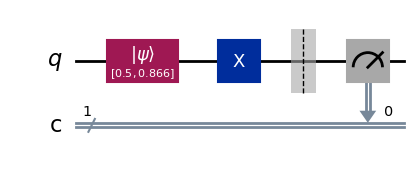


=== REPRESENTACIÓN EN LA ESFERA DE BLOCH ===

Estado inicial |ψ⟩:


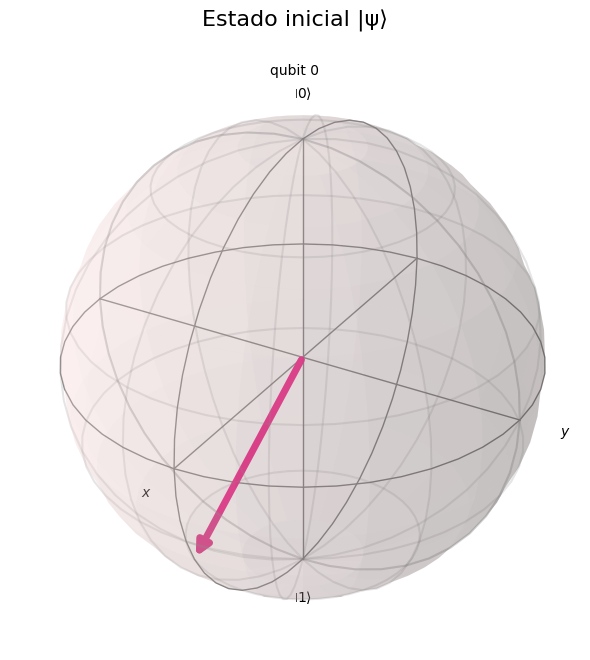

Estado final X|ψ⟩:


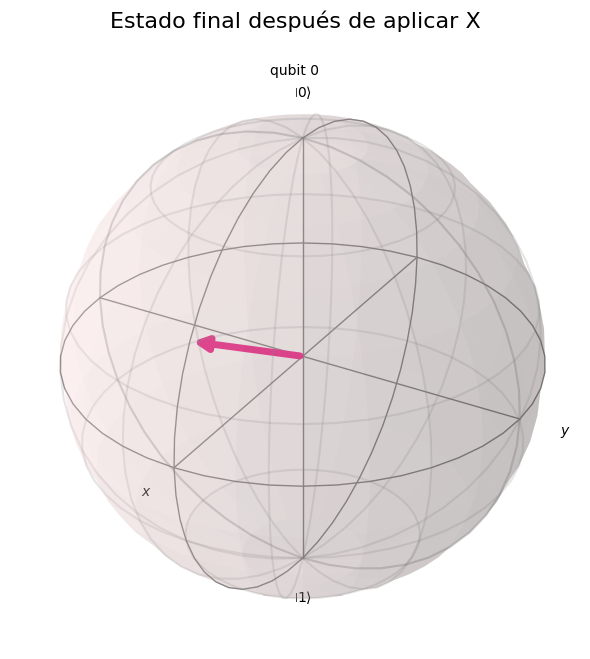


=== RESULTADO TEÓRICO ===
Statevector inicial: [0.5      +0.j 0.8660254+0.j]
Statevector final (después de X): [0.8660254+0.j 0.5      +0.j]

Estado resultante: |ψ'⟩ = (0.866)|0⟩ + (0.500)|1⟩
                   ≈ (√3/2)|0⟩ + (0.5)|1⟩

Probabilidades teóricas:
P(|0⟩) = 0.750 (75.0%)
P(|1⟩) = 0.250 (25.0%)

=== RESULTADO EXPERIMENTAL ===
Resultados de simulación (1000 shots):
  |0⟩:  745 veces (74.5%) - Teórico: 75.0%
  |1⟩:  255 veces (25.5%) - Teórico: 25.0%

Distribución de resultados:


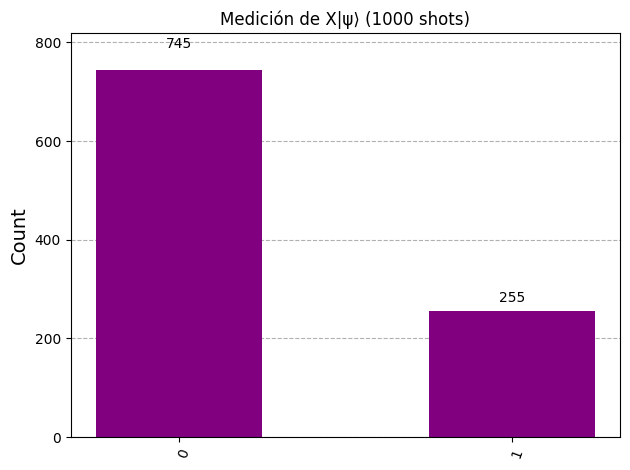


=== CONCLUSIÓN ===
La puerta Pauli-X invierte las amplitudes:
    X(α|0⟩ + β|1⟩) = β|0⟩ + α|1⟩
    Aquí: 0.5|0⟩ + 0.866|1⟩  →  0.866|0⟩ + 0.5|1⟩
En la esfera de Bloch: reflexión perfecta respecto al eje X.


In [8]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from IPython.display import display

print("=== APLICACIÓN DE LA PUERTA PAULI-X SOBRE UN ESTADO PERSONALIZADO ===\n")

# Estado inicial personalizado
alpha = 1/2
beta = np.sqrt(3)/2
psi_initial = [alpha, beta]

print("Estado inicial |ψ⟩:")
print(f"Amplitudes: [{alpha:.3f}, {beta:.3f}]")
print(f"Notación dirac: |ψ⟩ = ({alpha:.1f})|0⟩ + (√3/2)|1⟩")
print(f"                     ≈ {alpha:.3f}|0⟩ + {beta:.3f}|1⟩\n")

# Circuito base
qc = QuantumCircuit(1, 1)
qc.initialize(psi_initial, 0)
qc.x(0)

# Circuito con medición
qc_sim = qc.copy()
qc_sim.barrier()
qc_sim.measure(0, 0)

# Circuito gráfico bonito
print("Circuito cuántico:")
display(qc_sim.draw(output='mpl'))
print()

# ==================== ESFERA DE BLOCH ====================
print("=== REPRESENTACIÓN EN LA ESFERA DE BLOCH ===\n")

# Estado inicial
qc_initial = QuantumCircuit(1)
qc_initial.initialize(psi_initial, 0)
sv_initial = Statevector.from_instruction(qc_initial)

# Estado final (después de X)
sv_final = Statevector.from_instruction(qc)

# Mostrar dos esferas grandes, una tras otra (se ven genial en notebooks)
print("Estado inicial |ψ⟩:")
display(plot_bloch_multivector(sv_initial, title="Estado inicial |ψ⟩", figsize=(6, 6)))

print("Estado final X|ψ⟩:")
display(plot_bloch_multivector(sv_final, title="Estado final después de aplicar X", figsize=(6, 6)))
print()

# ==================== RESULTADO TEÓRICO ====================
print("=== RESULTADO TEÓRICO ===")
print(f"Statevector inicial: {sv_initial.data}")
print(f"Statevector final (después de X): {sv_final.data}")

print(f"\nEstado resultante: |ψ'⟩ = ({beta:.3f})|0⟩ + ({alpha:.3f})|1⟩")
print(f"                   ≈ (√3/2)|0⟩ + (0.5)|1⟩")

probs_theory = sv_final.probabilities()
print("\nProbabilidades teóricas:")
print(f"P(|0⟩) = {probs_theory[0]:.3f} ({probs_theory[0]:.1%})")
print(f"P(|1⟩) = {probs_theory[1]:.3f} ({probs_theory[1]:.1%})")
print()

# ==================== RESULTADO EXPERIMENTAL ====================
print("=== RESULTADO EXPERIMENTAL ===")
shots = 1000
simulator = AerSimulator()
result = simulator.run(qc_sim, shots=shots).result()
counts = result.get_counts()

print(f"Resultados de simulación ({shots} shots):")
for state in ['0', '1']:
    count = counts.get(state, 0)
    prob_exp = count / shots
    prob_teo = probs_theory[int(state)]
    print(f"  |{state}⟩: {count:4d} veces ({prob_exp:.1%}) - Teórico: {prob_teo:.1%}")

# Histograma
print("\nDistribución de resultados:")
display(plot_histogram(counts, title=f"Medición de X|ψ⟩ ({shots} shots)", color='purple'))

# ==================== CONCLUSIÓN ====================
print("\n=== CONCLUSIÓN ===")
print("La puerta Pauli-X invierte las amplitudes:")
print("    X(α|0⟩ + β|1⟩) = β|0⟩ + α|1⟩")
print(f"    Aquí: {alpha:.1f}|0⟩ + {beta:.3f}|1⟩  →  {beta:.3f}|0⟩ + {alpha:.1f}|1⟩")
print("En la esfera de Bloch: reflexión perfecta respecto al eje X.")

# Aplicación de la Puerta Pauli-X en un Sistema de Dos Qubits

## Estado inicial

Consideramos un sistema de **dos qubits** inicializado en el estado:

$$
|\psi\rangle = \frac{1}{2}|00\rangle + \frac{1}{2}|01\rangle + \frac{1}{2}|10\rangle + \frac{1}{2}|11\rangle
= \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)
$$

Este estado es una **superposición uniforme** de los cuatro estados base. También puede escribirse como:

$$
|\psi\rangle = \frac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle \right) \otimes \frac{1}{\sqrt{2}} \left( |0\rangle + |1\rangle \right) = |+\rangle \otimes |+\rangle
$$

donde $|+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$ es el estado de superposición perfecta de un qubit.

La norma es 1:

$$
\left(\frac{1}{2}\right)^2 \times 4 = \frac{1}{4} \times 4 = 1
$$

## Acción de la puerta Pauli-X

Aplicamos la puerta Pauli-X **solo al segundo qubit** (índice 1):

$$
I \otimes X
$$

La matriz total en la base {|00⟩, |01⟩, |10⟩, |11⟩} es:

$$
I \otimes X = \begin{pmatrix} 
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 
\end{pmatrix}
$$

El efecto es **intercambiar las amplitudes de |0⟩ y |1⟩ solo en el segundo qubit**:

$$
X|0\rangle = |1\rangle, \quad X|1\rangle = |0\rangle
$$

Por lo tanto:

$$
|\psi'\rangle = \frac{1}{2}|01\rangle + \frac{1}{2}|00\rangle + \frac{1}{2}|11\rangle + \frac{1}{2}|10\rangle
= \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)
$$

¡El estado final es **idéntico al inicial**!

## Probabilidades de medición

Al medir ambos qubits en la base computacional, las probabilidades son:

$$
P(|00\rangle) = P(|01\rangle) = P(|10\rangle) = P(|11\rangle) = \left|\frac{1}{2}\right|^2 = 0.25 \ (25\%)
$$

No cambia nada tras aplicar la puerta X al segundo qubit.

## Interpretación

Aunque la puerta X invierte el estado de un qubit individual, aquí actúa sobre un qubit que está en superposición perfecta $|+\rangle$. Matemáticamente:

$$
X |+\rangle = X \left( \frac{|0\rangle + |1\rangle}{\sqrt{2}} \right) = \frac{X|0\rangle + X|1\rangle}{\sqrt{2}} = \frac{|1\rangle + |0\rangle}{\sqrt{2}} = |+\rangle
$$

¡La puerta X **deja invariante** el estado $|+\rangle$!

Por eso el estado global $|+\rangle \otimes |+\rangle$ permanece igual tras aplicar $I \otimes X$.

## Simulación experimental

Al ejecutar el circuito 2000 veces, esperamos ver aproximadamente **500 mediciones** de cada uno de los cuatro estados posibles (25% cada uno), tanto antes como después de la puerta X.

Esto confirma que, en este caso particular, la puerta Pauli-X no produce ningún cambio observable en las estadísticas de medición.

=== APLICACIÓN DE LA PUERTA PAULI-X EN UN SISTEMA DE DOS QUBITS ===

Circuito cuántico ejecutado:


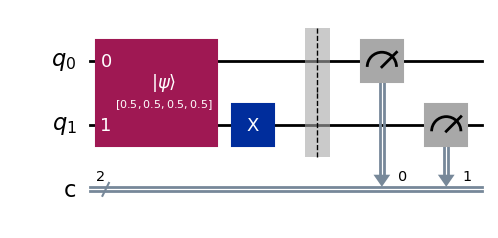


=== RESULTADO TEÓRICO ===
Statevector inicial: [0.5, 0.5, 0.5, 0.5]
Statevector final  : [0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
→ ¡El estado no cambia!

Probabilidades teóricas (después de X en qubit 1):
  P(|00⟩) = 0.250 (25.0%)
  P(|01⟩) = 0.250 (25.0%)
  P(|10⟩) = 0.250 (25.0%)
  P(|11⟩) = 0.250 (25.0%)

=== RESULTADO EXPERIMENTAL ===
Resultados de simulación (2000 shots):
  |00⟩:   488 veces ( 24.4%) - Teórico: 25.0%
  |01⟩:   518 veces ( 25.9%) - Teórico: 25.0%
  |10⟩:   494 veces ( 24.7%) - Teórico: 25.0%
  |11⟩:   500 veces ( 25.0%) - Teórico: 25.0%

Distribución de resultados:


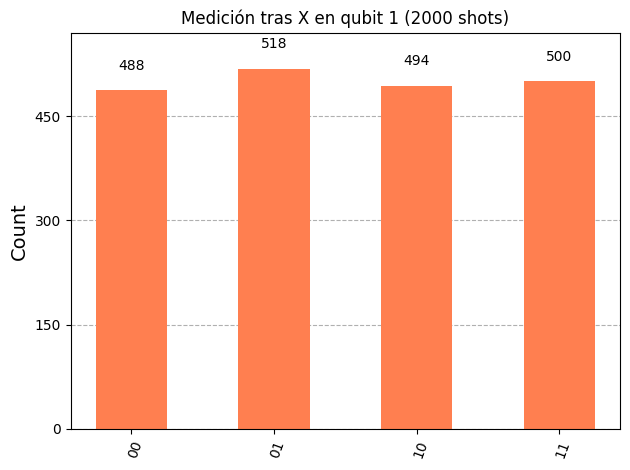

In [10]:
# Importar librerías necesarias
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display
import numpy as np

print("=== APLICACIÓN DE LA PUERTA PAULI-X EN UN SISTEMA DE DOS QUBITS ===\n")

# Estado inicial: superposición uniforme (equivalente a |+⟩ ⊗ |+⟩)
amplitudes = [1/2, 1/2, 1/2, 1/2]  # orden: |00⟩, |01⟩, |10⟩, |11⟩

# Circuito base (para cálculo teórico)
qc_theory = QuantumCircuit(2)
qc_theory.initialize(amplitudes, [0, 1])
qc_theory.x(1)  # Pauli-X solo en el qubit 1 (el menos significativo en Qiskit)

# Circuito con medición para simulación
qc_sim = QuantumCircuit(2, 2)
qc_sim.initialize(amplitudes, [0, 1])
qc_sim.x(1)
qc_sim.barrier()  # Separador visual
qc_sim.measure([0, 1], [0, 1])

# Mostrar circuito gráfico bonito
print("Circuito cuántico ejecutado:")
display(qc_sim.draw(output='mpl'))
print()

# ==================== RESULTADO TEÓRICO ====================
print("=== RESULTADO TEÓRICO ===")
sv = Statevector.from_instruction(qc_theory)

print(f"Statevector inicial: [0.5, 0.5, 0.5, 0.5]")
print(f"Statevector final  : {np.round(sv.data, 8)}")
print("→ ¡El estado no cambia!\n")

probs_theory = sv.probabilities_dict()
order = ["00", "01", "10", "11"]

print("Probabilidades teóricas (después de X en qubit 1):")
for state in order:
    prob = probs_theory.get(state, 0.0)
    print(f"  P(|{state}⟩) = {prob:.3f} ({prob:.1%})")
print()

# ==================== RESULTADO EXPERIMENTAL ====================
print("=== RESULTADO EXPERIMENTAL ===")
shots = 2000
simulator = AerSimulator()
tqc = transpile(qc_sim, simulator)
result = simulator.run(tqc, shots=shots).result()
counts = result.get_counts()

print(f"Resultados de simulación ({shots} shots):")
for state in order:
    count = counts.get(state, 0)
    prob_exp = count / shots
    prob_teo = probs_theory.get(state, 0.0)
    print(f"  |{state}⟩: {count:5d} veces ({prob_exp:6.1%}) - Teórico: {prob_teo:.1%}")

# Histograma visual
print("\nDistribución de resultados:")
display(plot_histogram(counts, title=f"Medición tras X en qubit 1 ({shots} shots)", color='coral'))


